<div style="border:solid green 3px; padding: 20px">
<b>🥇 Анна, спасибо за доработки, проект принят, молодец!</b>
    
Ты провела очень хорошую работу над ошибками! Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### <font color='#473C8B'>Цели исследования</font>

Итак, нам предстоит найти от каких фактов в большей степени зависит цена на недвижимость. А также от чего может зависеть как быстро продаётся жильё. А именно:    
- от общей площади, в том числе от жилой площади и площади кухни;    
- от этажа, особенно если это первый или последний этаж;    
- а может быть от количества балконов и высоты потолков.   
   
Также в нашем распоряжении будет следующая информация:    
- дата публикации объявления;
- район или населённый пункт;
- прочая информация об объекте недвижимости - апартаменты, студия или квартира со свободной планировкой;
- количество фотографий;
- удалённость от центра и аэропорта;
- близость парков и водоёмов.

#### <font color='#473C8B'>Ход исследования:</font>

- провести первичную обработку данных - там, где это возможно заменить пропущенные значения, удалить аномальные, найти дубликаты;
- изучить все данные и их распределения, определить особенности;
- проверить все имеющиеся параметры - как и насколько зависит от каждого из них цена на недвижимость;
- проанализировать данные о количестве дней, в течение которых объявления были опубликованы, попытаться найти возможные причины "долгих" продаж;
- выяснить, в какие из населенных пунктов с самым большим (по количеству объявлений) рынком недвижимости имеют также и самые высокие цены на жильё;
- для квартир из Санкт-Петербурга найти как зависит цена от удалённости от центра города, рассчитав цену за 1 км расстояния;
- выбрать параметры, которые являются определяющими для цены на недвижимость, чтобы рекомендовать заказчику осуществлять проверку указанной в объявлении информации.
</div>
<hr>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# Прочитаем файл формата csv. При первой попытке это сделать, выяснилось, что в качестве
# разделителя столбцов в исходном файле используется знак табуляции. Добавим соответствующий
# параметр при вызове метода read_csv
try:
    data  = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    try:
        data = pd.read_csv('real_estate_data.csv', sep='\t')
    except: 
        data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')


In [3]:
# Сделаем так, чтобы отображались все столбцы таблицы    
pd.set_option('display.max_columns', 30)

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

По результатам анализа исходного датасета наблюдаем, что среди 22-х столбцов пропуски имеются в 14-ти столбцах.

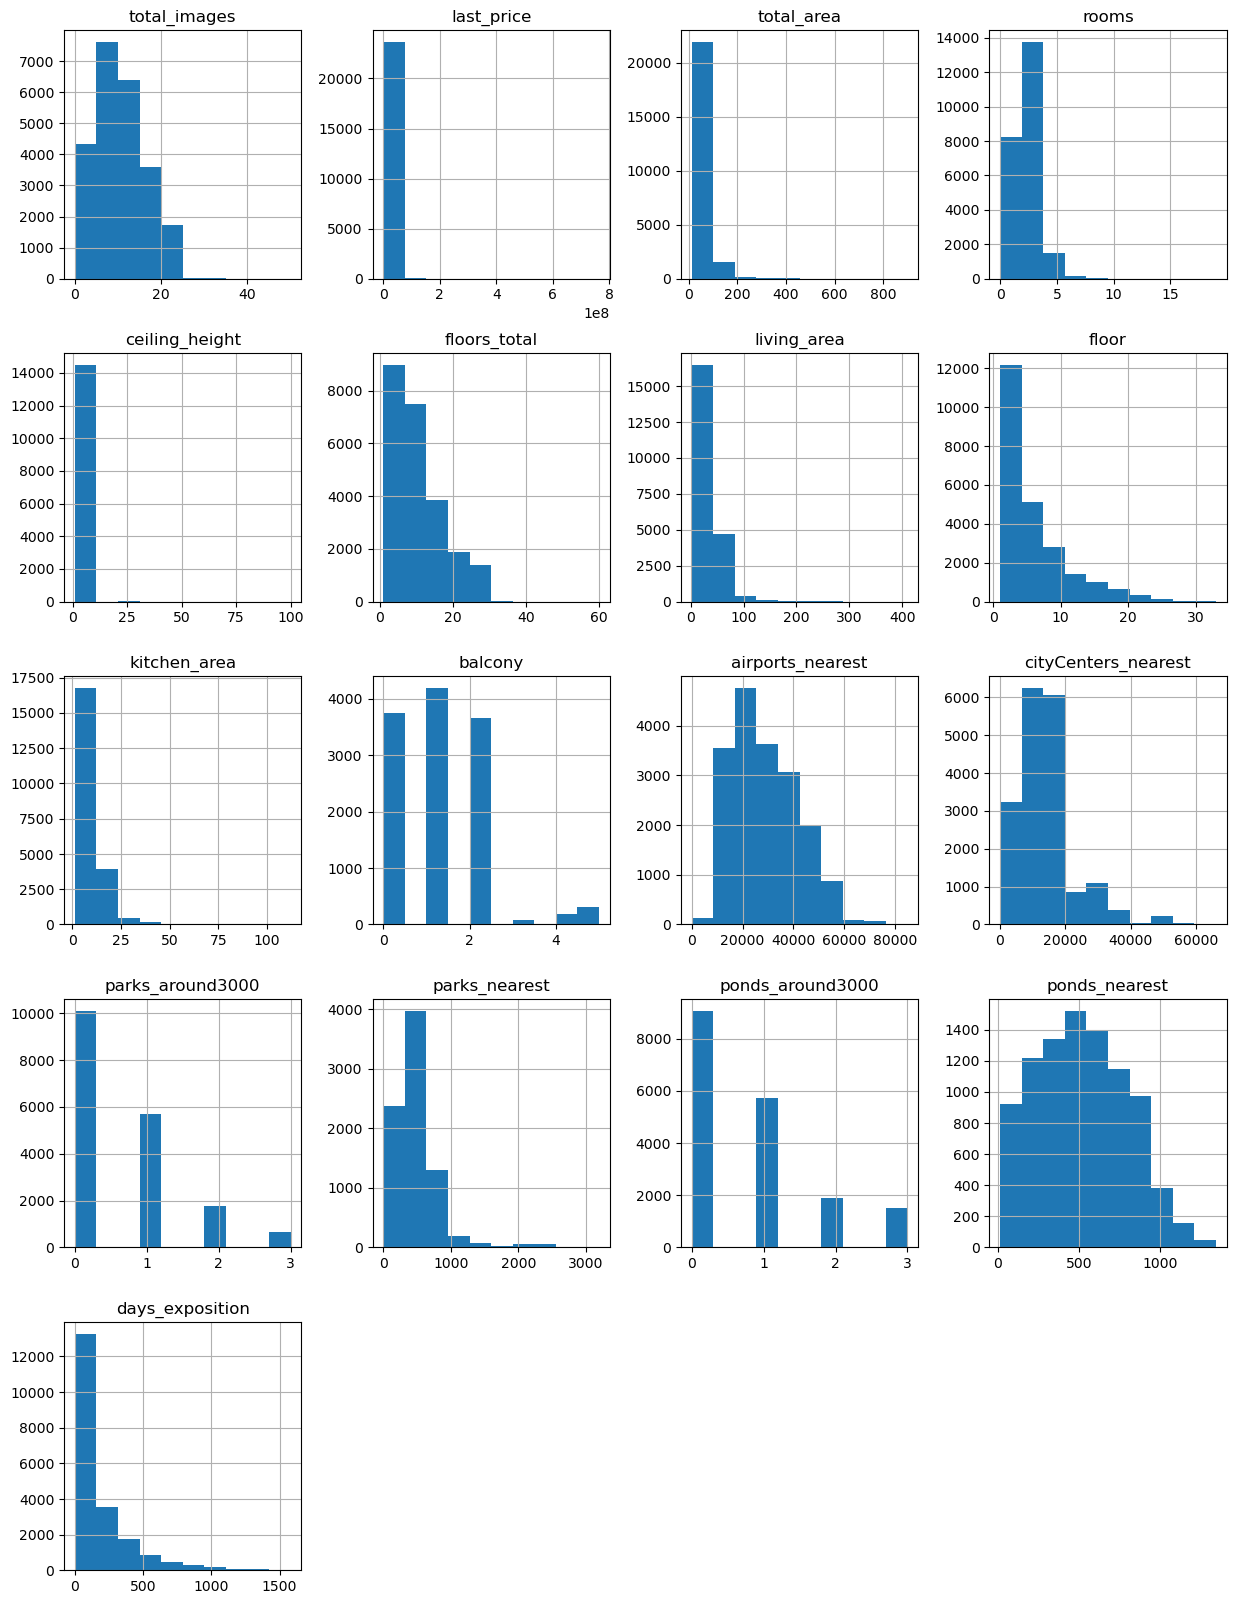

In [6]:
data.hist(figsize=(15, 20))
plt.show()

Файл содержит данные по 23699 объектам недвижимости, каждый из которых описывается 22 признаками (17 количественных, 4 категориальных и 1 временной). У некоторых признаков есть пропущенные значения, которые необходимо обработать.


### Предобработка данных

#### Пропущенные значения.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**ceiling_height:** пропуски в данных о высоте потолков целесообразно заменить на среднее значение, исходя из закономерности с общим количеством этажей в доме (можно логически предположить, дома с одинаковым количеством этажей часто одного типа строения).

In [8]:
for element in data['floors_total'].unique():
    data.loc[(data['floors_total'] == element) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == element), 'ceiling_height'].mean()

In [9]:
data['ceiling_height'].isna().sum()

78

**floors_total:** Пропуски в столбце c общим количеством этажей в доме заполнить не представляется возможным и их малая доля, поэтому все строки с пропущенными значениями удалены.

In [10]:
data.dropna(subset=['floors_total'], inplace=True)

In [11]:
data['floors_total'].isna().sum()

0

**living_area:** Была построена зависимость, если нам известна общая площадь недвижимости и площадь кухни, то можно расчитать сколько квадратных метров составляет жилая площадь на основе уже заполненных пользователем данных.  

In [12]:
#def living_area_isna(row):
    #if math.isnan(row['living_area']):
        #living_area = row['total_area'] - row['kitchen_area']
        #return living_area
    #else:
        #return row['living_area']
#data['living_area'] = data.apply(living_area_isna, axis=1)

In [13]:
#коэффициент жилой площади
k_living_area = (data['living_area'] / data['total_area']).mean()

In [14]:
data['living_area'].fillna(k_living_area * data['total_area'], inplace=True)

In [15]:
data['living_area'].isna().sum()

0

**kitchen_area:**

In [16]:
#коэффициент площади кухни
k_kitchen_area = (data['kitchen_area'] / data['total_area']).mean()

In [17]:
data['kitchen_area'].fillna(k_kitchen_area * data['total_area'], inplace=True)

In [18]:
data['kitchen_area'].isna().sum()

0

In [19]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0

In [20]:
data['kitchen_area'].isna().sum()

0

**is_apartment:** Пропуски столбца "Аппартаменты" заполняем False, так как вероятнее всего пользователи не указали, что их квартира НЕ апартаменты. 

In [21]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [22]:
data['is_apartment'].isna().sum()

0

**balcony:** Предпологается, что отсутствие числа балконов свидетельствует о том, что число балконов равно 0.

In [23]:
data['balcony'] = data['balcony'].fillna(value='0')

In [24]:
data['balcony'].isna().sum()

0

**locality_name:** Пропуски в столбце "название местности" заполнить не представляется возможным и их малая доля, поэтому все строки с пропущенными значениями удалены. 

In [25]:
data.dropna(subset=['locality_name'], inplace=True)

In [26]:
data['locality_name'].isna().sum()

0

**airports_nearest:** Пропуски данных "ближайших аэропортов" заполняем средним значением в зависимости от населенного пункта.

In [27]:
for element in data['locality_name'].unique():
    data.loc[(data['locality_name'] == element) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == element), 'airports_nearest'].mean()

In [28]:
data['airports_nearest'].isna().sum()

5432

Пропуски данных в следующих столбцах: cityCenters_nearest,  parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition заполнить не является возможным из соображений логики. 
                            

Причинами наличия пропусков может быть следующее:
1. Пользователи пропускают заполнение поля, если оно к ним не имеет отношения(например, пропуски в полях апартаменты или же балконы).
2. Пользователи за незнанием/большой отдаленностью не указывают такие данные как расстояние до аэропорта/парка/водоема, что также приводит к пропускам.

#### Замена типов данных.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23564 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  object 
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Столбец first_day_exposition преобразовываем к типу данных datetime.

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Заменим количество этажей на целое число, так как общее количество этажей не может измеряться в долях.

In [31]:
data['floors_total'] = data['floors_total'].astype(int)

Тип данных столбца is_apartment лучше поменять на bool, так как там либо да, либо нет.

In [32]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Число балконов также не может быть не целым числом, поэтому заменим его на целое.

In [33]:
data['balcony'] = data['balcony'].astype(int)

Уберем ошибку в названии столбца cityCenters_nearest

In [34]:
dаta = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [36]:
# код ревьюера
dаta.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,False,False,25.00000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.782385,11,18.600000,1,False,False,False,11.00000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.793191,5,34.300000,4,False,False,False,8.30000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.731545,14,89.826726,9,False,False,False,29.78452,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,False,False,False,41.00000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Устранение неявных дубликатов.

In [37]:
#приведем к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [38]:
#количество уникальных значений до обработки
len(data['locality_name'].sort_values().unique())

364

In [39]:
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка

In [40]:
#убираем неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')


In [41]:
#количество уникальных значений после обработки
len(data['locality_name'].sort_values().unique())

321

#### Обработка аномальных значений.

In [42]:
data['ceiling_height'].value_counts().sort_index()

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 213, dtype: int64

In [43]:
#Все значения высоты потолков больше 10, разделим на 10
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10

In [44]:
#Уберём значения меньше двух метров
data = data.loc[data['ceiling_height'] >= 2]

In [45]:
#Уберём квартиру со стометровыми потолками
data = data[data['ceiling_height'] != 100]

In [46]:
#Теперь уберём все квартиры выше пяти метров
data = data.loc[data['ceiling_height'] <= 5]

In [47]:
data['last_price'].value_counts().sort_index()

12190.0        1
430000.0       2
440000.0       1
450000.0       4
470000.0       3
              ..
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, Length: 2921, dtype: int64

In [48]:
#Уберём все квартиры выше 50-ти миллионов, так как они сильно выбиваются из статистики
data = data.loc[data['last_price'] <= 50000000]

In [49]:
#Также уберём все квартиры дешевле 700000
data = data.loc[data['last_price'] >= 700000]

In [50]:
#Наблюдаем, что есть квартира площадью 109 квадратных метров в городе Санкт-Петербург за 12 тысяч, вероятнее всего человек ошибся тремя нулями
data.loc[data['last_price'] == 12190, 'last_price'] = 12190000

In [51]:
data['rooms'].value_counts()

1     7958
2     7859
3     5742
4     1140
5      297
0      192
6       89
7       48
8        9
9        7
10       3
11       2
14       2
19       1
16       1
Name: rooms, dtype: int64

In [52]:
#Уберём редкие значения в виде числа комнат выше чем 6
data = data.loc[data['rooms'] <= 6]

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23277 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23277 non-null  int64         
 1   last_price            23277 non-null  float64       
 2   total_area            23277 non-null  float64       
 3   first_day_exposition  23277 non-null  datetime64[ns]
 4   rooms                 23277 non-null  int64         
 5   ceiling_height        23277 non-null  float64       
 6   floors_total          23277 non-null  int32         
 7   living_area           23277 non-null  float64       
 8   floor                 23277 non-null  int64         
 9   is_apartment          23277 non-null  bool          
 10  studio                23277 non-null  bool          
 11  open_plan             23277 non-null  bool          
 12  kitchen_area          23277 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [54]:
#добавляем столбец "цена одного квадратного метра"
data['price_one_m2'] = data['last_price'] / data['total_area']

In [55]:
#добавляем столбец "день недели публикации объявления" (0 — понедельник, 1 — вторник и так далее)
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday 

In [56]:
#добавляем столбец "месяц публикации объявления"
data['month_exposition'] = data['first_day_exposition'].dt.month 

In [57]:
#добавляем столбец "год публикации объявления"
data['year_exposition'] = data['first_day_exposition'].dt.year 

In [58]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m2,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.782385,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.793191,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.640258,12,14.4,5,False,False,False,9.1,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018


In [59]:
#добавляем столбец тип этажа квартиры (значения — «первый», «последний», «другой»)
def type_floor(row):
    if row ['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'
data['type_floor'] = data.apply(type_floor, axis=1) 

In [60]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

In [61]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m2,day_of_week_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,other,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.782385,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,first,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.793191,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,other,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,other,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.640258,12,14.4,5,False,False,False,9.1,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,other,NaN


### Проведите исследовательский анализ данных

#### Изучим параметры объектов (общая площадь; жилая площадь; лощадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до  ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления. 

**Распределение данных общей площади квартиры:**

In [62]:
data['total_area'].describe()

count    23277.000000
mean        58.697819
std         29.031484
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        494.100000
Name: total_area, dtype: float64

In [63]:
data['total_area'].median()


52.0

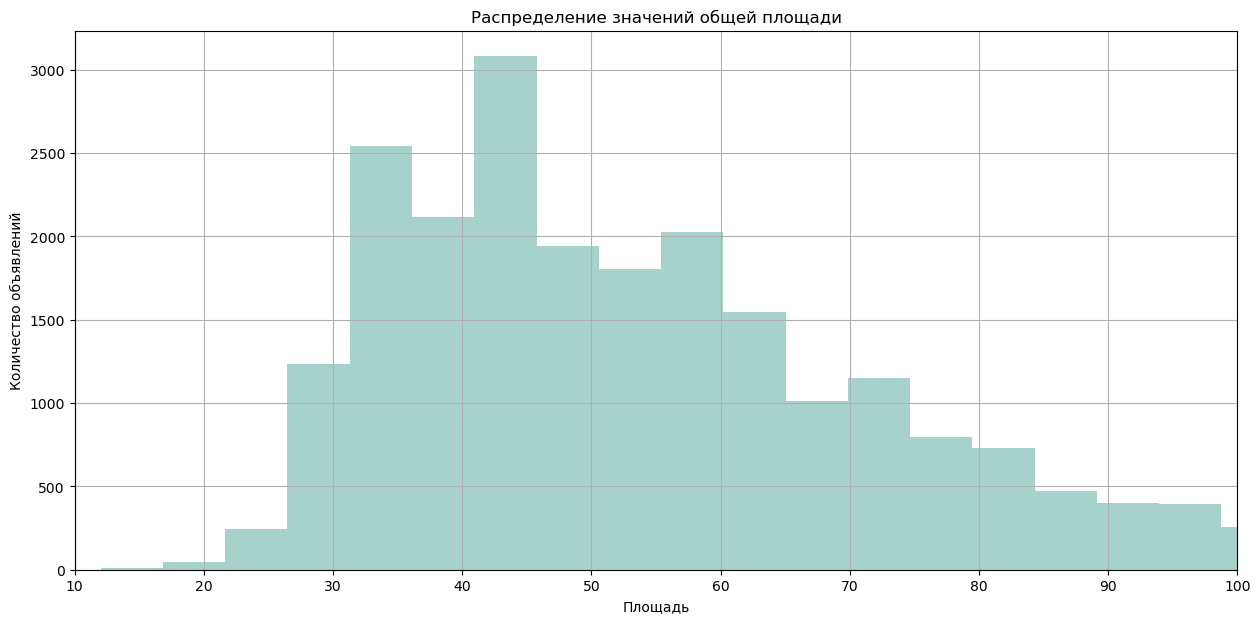

In [64]:
data['total_area'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(10, 100)

plt.title('Распределение значений общей площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

Большая часть квартир имеет метраж от 30 до 70 кв.м., пик приходится на 45 кв.м. Есть квартиры и по 400м, но это единичные выбросы.

**Распределение данных жилой площади квартиры:**

In [65]:
data['living_area'].describe()

count    23277.000000
mean        33.575603
std         18.518103
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        279.600000
Name: living_area, dtype: float64

In [66]:
data['living_area'].median()

30.0

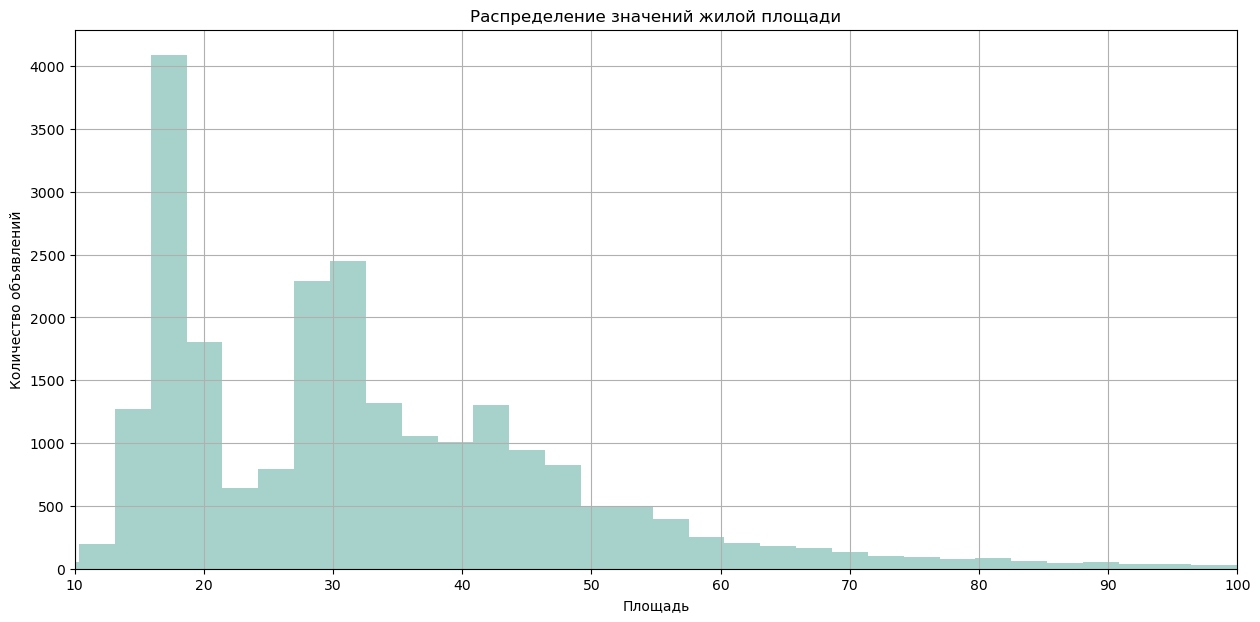

In [67]:
data['living_area'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(10, 100)

plt.title('Распределение значений жилой площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

In [68]:
#самое часто встречающееся значение 
data['living_area'].mode()

0    18.0
Name: living_area, dtype: float64

**Распределение данных площади кухни:**

In [69]:
data['kitchen_area'].describe()

count    23277.000000
mean        10.353949
std          5.484534
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        100.700000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

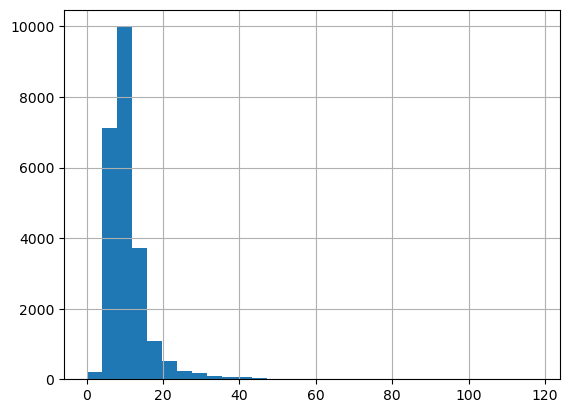

In [70]:
data['kitchen_area'].hist(bins=30, range=(0, 118))

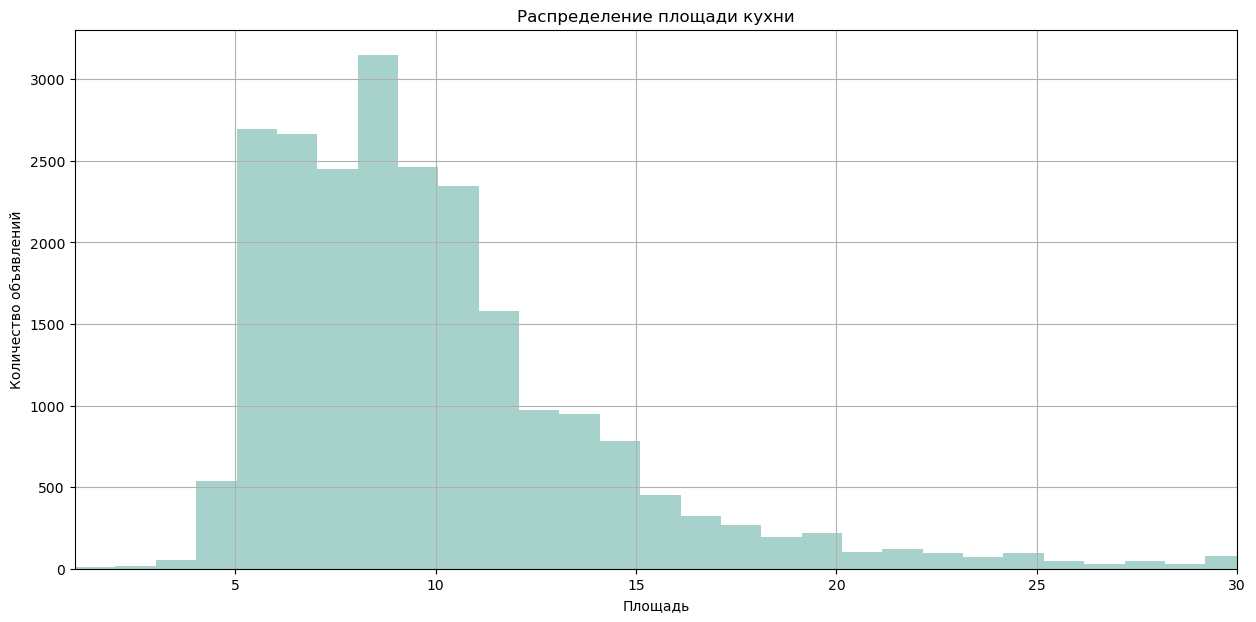

In [71]:
data['kitchen_area'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(1, 30)

plt.title('Распределение площади кухни')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

Большая часть квартир имеет метраж кухни от 5 до 11 кв.м., пик приходится на 7 кв.м. Кухни больше 40 кв. м. это единичные выбросы.

**Распределение данных цены объекта:**

In [72]:
data['last_price'].describe()

count    2.327700e+04
mean     5.951693e+06
std      4.837652e+06
min      7.000000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      5.000000e+07
Name: last_price, dtype: float64

In [73]:
# код ревьюера
data['last_price'].describe().round()

count       23277.0
mean      5951693.0
std       4837652.0
min        700000.0
25%       3400000.0
50%       4600000.0
75%       6700000.0
max      50000000.0
Name: last_price, dtype: float64

In [74]:
data['last_price'].median()

4600000.0

<AxesSubplot:>

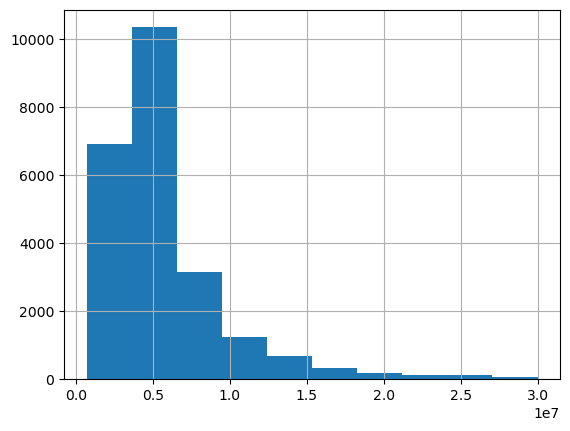

In [75]:
data['last_price'].hist(range=(700000, 30000000))

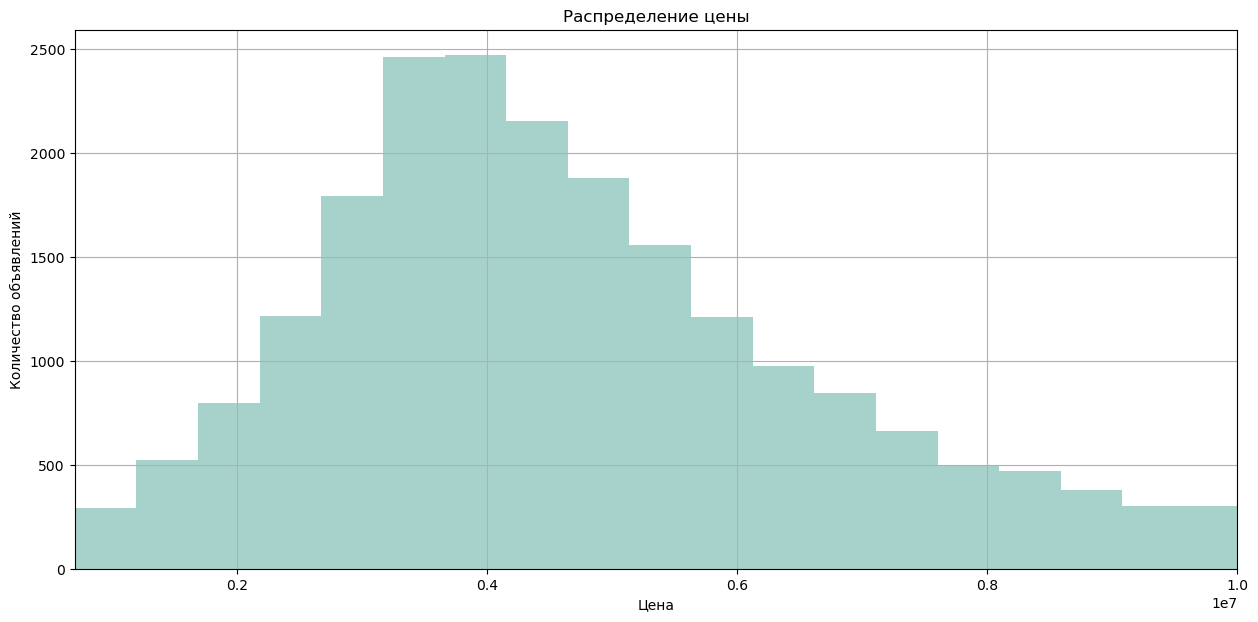

In [76]:
data['last_price'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(700000, 10000000)

plt.title('Распределение цены')
plt.xlabel('Цена') 
plt.ylabel('Количество объявлений')
plt.show()

**Распределение данных по количеству комнат в квартире:**

<AxesSubplot:>

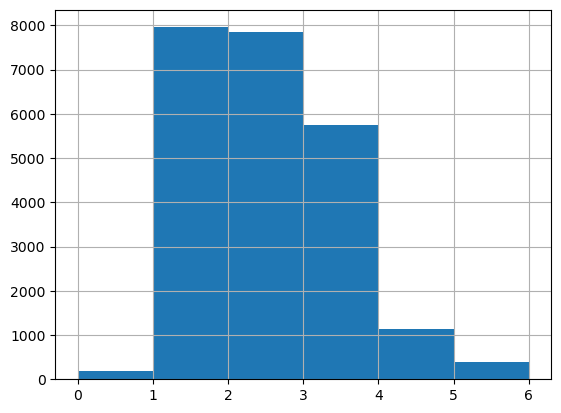

In [77]:
data['rooms'].hist(bins=6)

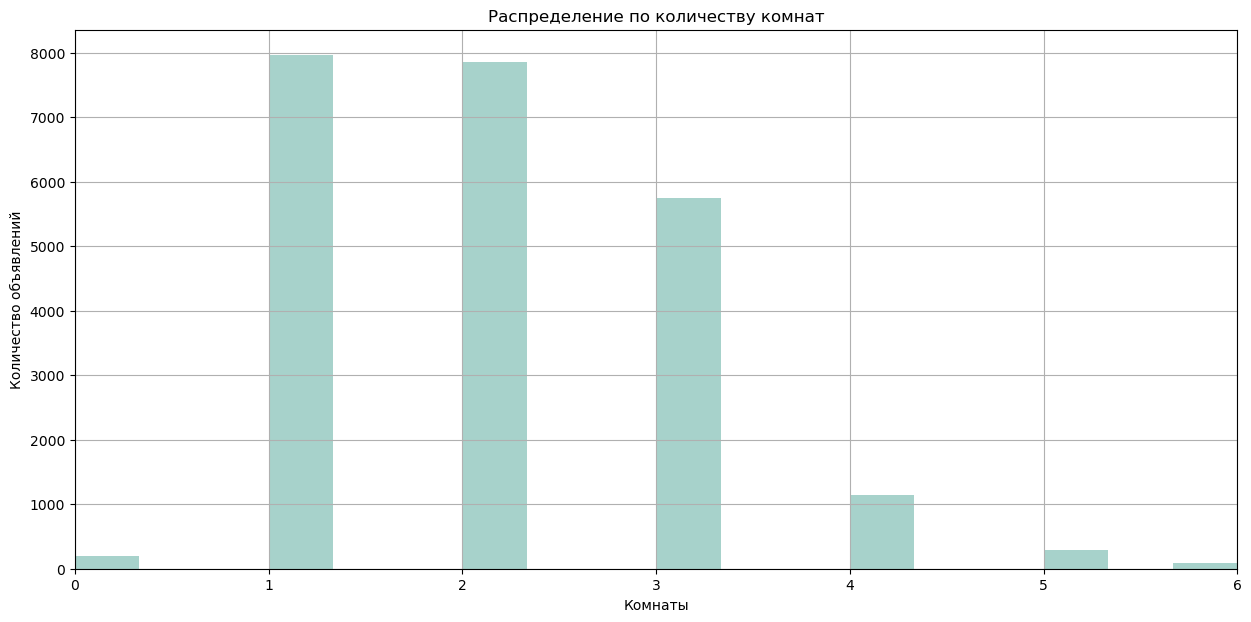

In [78]:
data['rooms'].hist(bins = 18, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 6)

plt.title('Распределение по количеству комнат')
plt.xlabel('Комнаты') 
plt.ylabel('Количество объявлений')
plt.show()

In [79]:
#сгруппируем по количеству комнат и посчитаем на какое количество комнат какая приходится доля квартир в датасете
data.groupby('rooms')['rooms'].count() / len(data['rooms'])

rooms
0    0.008248
1    0.341883
2    0.337629
3    0.246681
4    0.048975
5    0.012759
6    0.003824
Name: rooms, dtype: float64

Самую большую долю составляют однокомнатные и двухкомнатные квартиры по 34 %, трехкомнатные - 25 %, пятикомнатные - 13 %, с нулевым количеством комнат (студии) составляют 8 %, четырехкомнатные - 5 %,  шестикомнатные - 4 %.

**Распределение данных высоты потолков:**

In [80]:
data['ceiling_height'].describe()

count    23277.000000
mean         2.738693
std          0.220311
min          2.000000
25%          2.599093
50%          2.704582
75%          2.793191
max          4.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

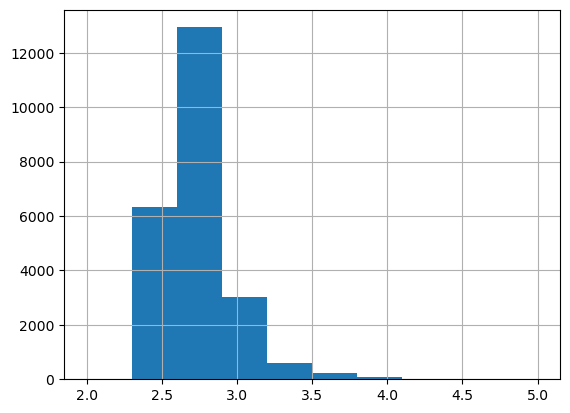

In [81]:
data['ceiling_height'].hist(range=(2, 5))

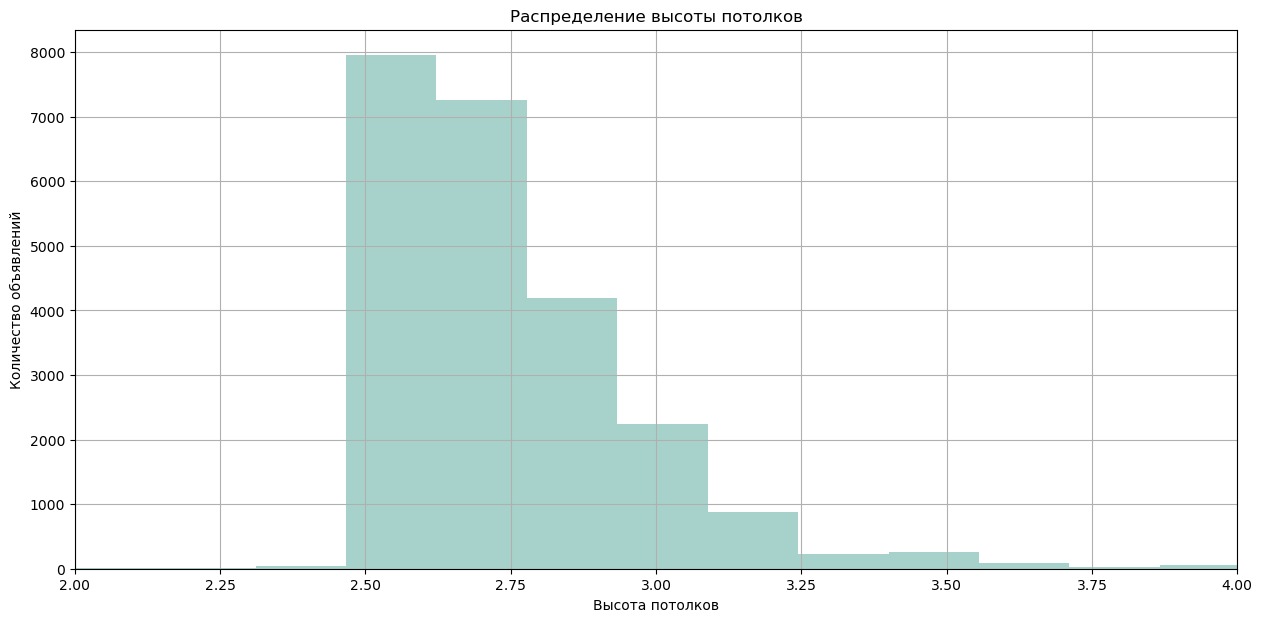

In [82]:
data['ceiling_height'].hist(bins = 18, figsize = (15, 7), color='#A7D2CB')
plt.xlim(2, 4)

plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков') 
plt.ylabel('Количество объявлений')
plt.show()

Квартиры, в большинстве своем, имеют потолки от 2,5-2,75м (самый популярный вариант) до 3,2м. Остальные случаи - эксклюзивы.

**Распределение данных по этажам, на котором находятся квартиры:**

In [83]:
data['floor'].median()

4.0

In [84]:
data['floor'].describe()

count    23277.000000
mean         5.894574
std          4.879759
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

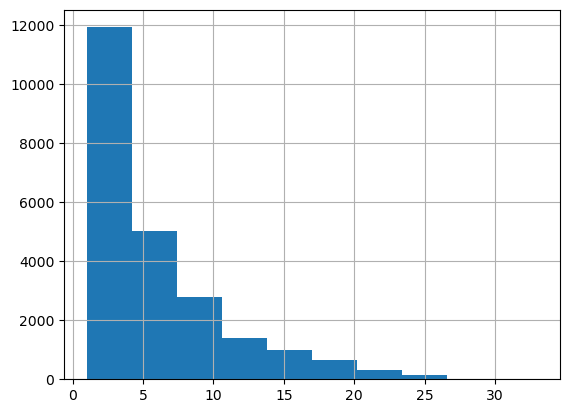

In [85]:
data['floor'].hist(range=(1, 33))

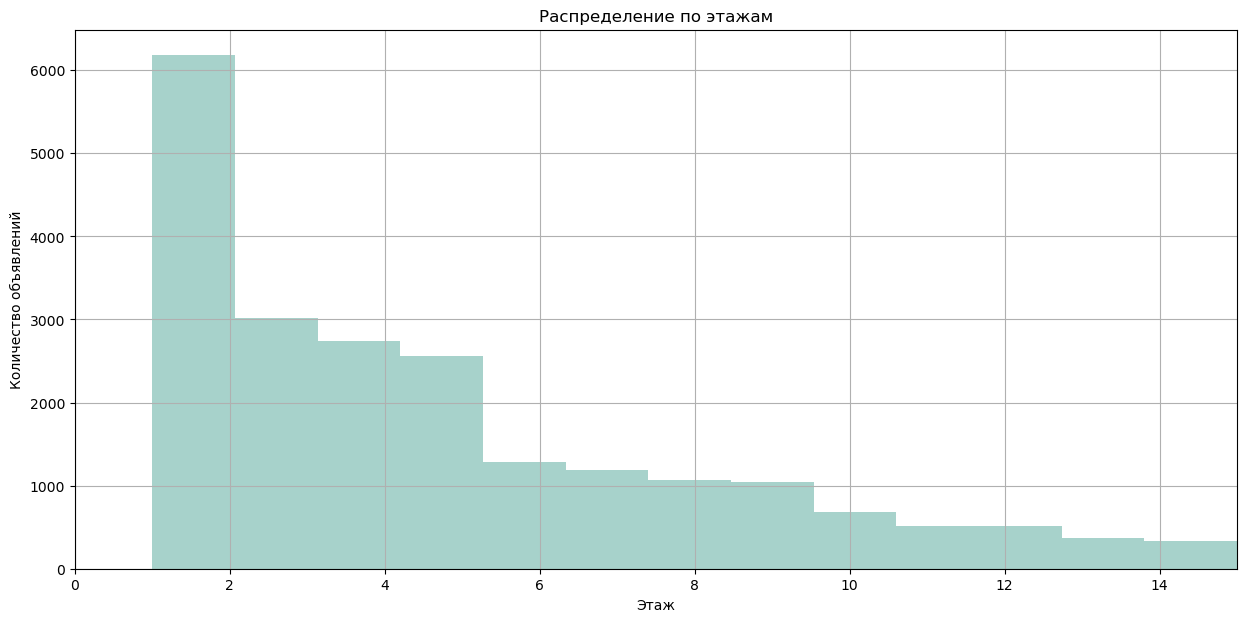

In [86]:
data['floor'].hist(bins = 30, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 15)

plt.title('Распределение по этажам')
plt.xlabel('Этаж') 
plt.ylabel('Количество объявлений')
plt.show()

Большая часть квартир находится со 2 по 8 этаж. Особенно много квартир, находящихся на 2 этаже.

**Распределение данных по типу этажа(первый, последний, другой):**

<AxesSubplot:>

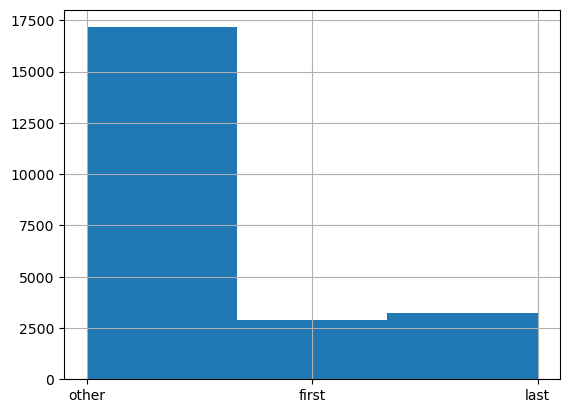

In [87]:
data['type_floor'].hist(bins=3)

In [88]:
#сгруппируем по категориям этажей (первый, последний, другой) и считаем на какую категорию приходит какая доля
data.groupby('type_floor')['floor'].count() / len(data['floor'])

type_floor
first    0.123298
last     0.139451
other    0.737251
Name: floor, dtype: float64

На категорию first приходится 12 % квартир, last - 14 % квартир, а на other - 74 % квартир.

**Распределение данных общего количества этажей в доме:**

In [89]:
data['floors_total'].describe()

count    23277.000000
mean        10.729003
std          6.598711
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

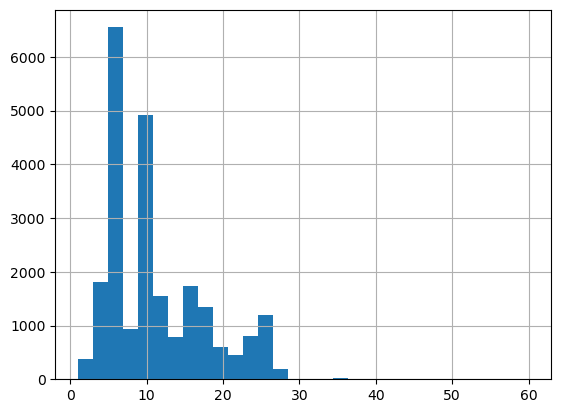

In [90]:
data['floors_total'].hist(bins=30, range=(1, 60))

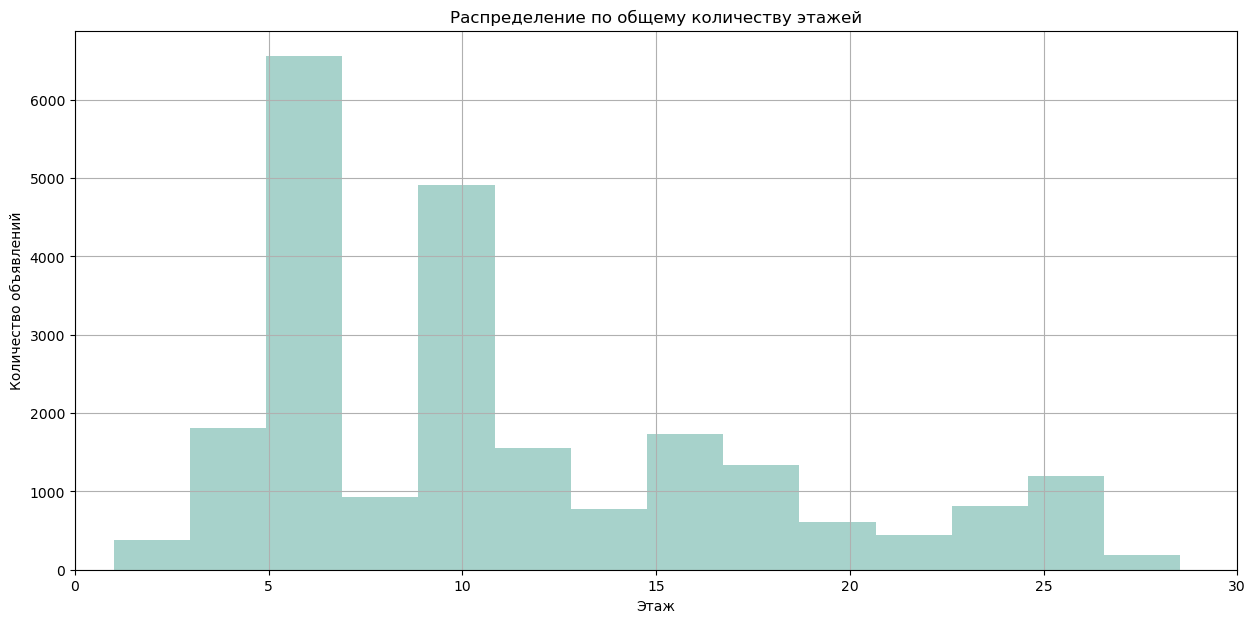

In [91]:
data['floors_total'].hist(bins = 30, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 30)

plt.title('Распределение по общему количеству этажей')
plt.xlabel('Этаж') 
plt.ylabel('Количество объявлений')
plt.show()

Большая часть домов по строению от пятиэтаных до двадцатипятиэтажных.

**Распределение данных расстояния от объекта до центра города:**

In [92]:
data['cityCenters_nearest'].describe()

count    17849.000000
mean     14297.077483
std       8596.888919
min        181.000000
25%       9439.000000
50%      13164.000000
75%      16318.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

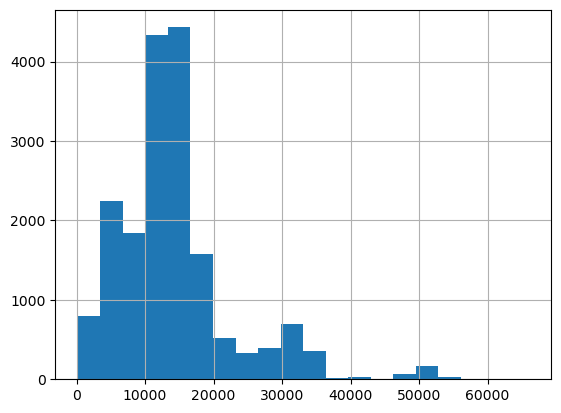

In [93]:
data['cityCenters_nearest'].hist(bins=20, range=(180, 66000))

Самый большой выбор квартир выставленных на продажу с расстоянием от центра  10 - 16 км.

**Распределение данных расстояния от объекта до аэропорта:**

In [94]:
data['airports_nearest'].describe()

count    17915.000000
mean     28834.078654
std      12662.716321
min          0.000000
25%      18522.000000
50%      26911.000000
75%      37347.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

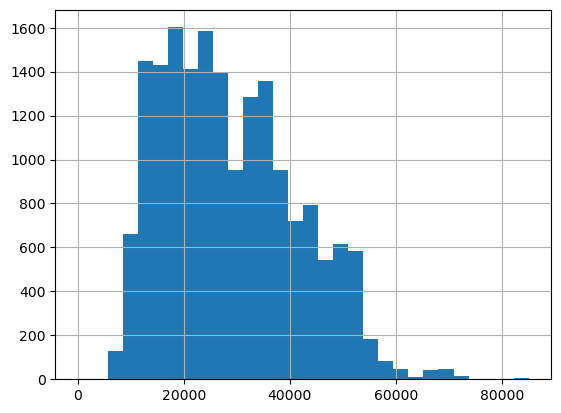

In [95]:
data['airports_nearest'].hist(bins=30, range=(0, 85000))

Самый большой выбор квартир с отдаленностью от аэропорта  18 - 40 км.

**Распределение данных расстояния от объекта до ближайшего парка:**

In [96]:
data['parks_nearest'].describe()

count    7868.00000
mean      492.30516
std       342.14419
min         1.00000
25%       288.00000
50%       456.00000
75%       613.00000
max      3190.00000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

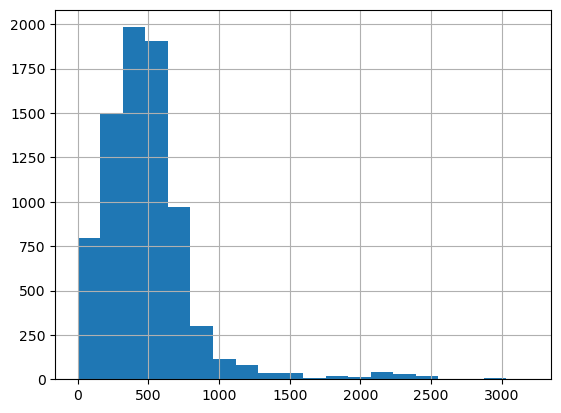

In [97]:
data['parks_nearest'].hist(bins=20, range=(1, 3190))

Большая часть объявлений квартир с ближайшим парком  100 - 600 км.

**Распределение данных дня недели публикации объявления:**

In [98]:
data['day_of_week_exposition'].median()

3.0

<AxesSubplot:>

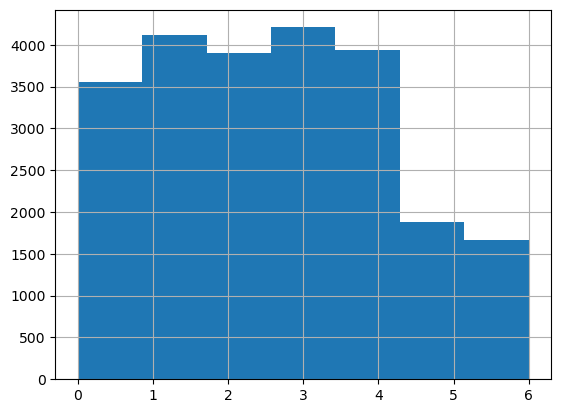

In [99]:
data['day_of_week_exposition'].hist(bins=7, range=(0, 6))

In [100]:
data.groupby('day_of_week_exposition')['day_of_week_exposition'].count()

day_of_week_exposition
0    3557
1    4122
2    3905
3    4210
4    3934
5    1886
6    1663
Name: day_of_week_exposition, dtype: int64

По данным видно, что на субботу и воскресенье приходится примерно в 2 раза меньше публикаций, чем в будние дни.

**Распределение публикаций по месяцам:**

<AxesSubplot:>

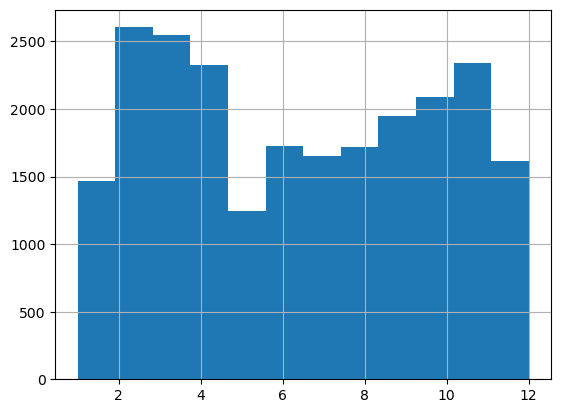

In [101]:
data['month_exposition'].hist(bins=12, range=(1, 12))

In [102]:
data.groupby('month_exposition')['month_exposition'].count() / len(data['month_exposition'])

month_exposition
1     0.063067
2     0.111870
3     0.109421
4     0.099970
5     0.053529
6     0.074065
7     0.070971
8     0.073850
9     0.083731
10    0.089702
11    0.100400
12    0.069425
Name: month_exposition, dtype: float64

Гистограмма и расчет доли показывают, что самые популярные месяцы публикаций обявлений о продаже квартир февраль и март, а затишье в мае и январе.

#### Изучите, как быстро продавались квартиры (столбец days_exposition). 

In [103]:
data['days_exposition'].describe()

count    20167.000000
mean       179.822482
std        218.971042
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [104]:
data['days_exposition'].median()

95.0

<AxesSubplot:>

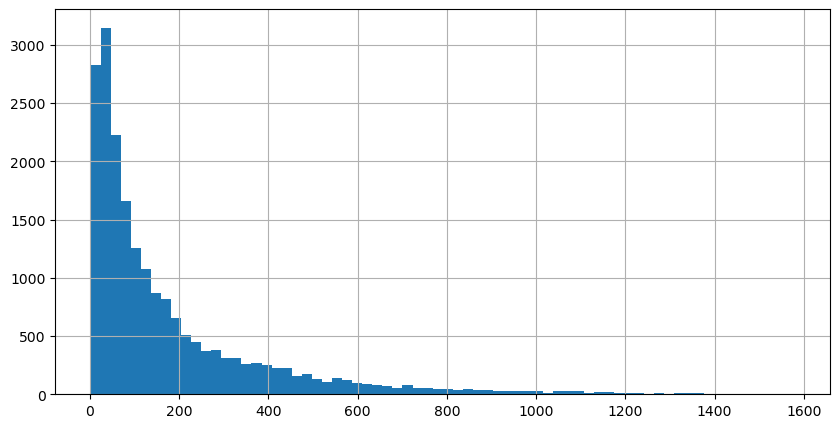

In [105]:
data['days_exposition'].hist(bins=70, figsize=(10,5))

<AxesSubplot:>

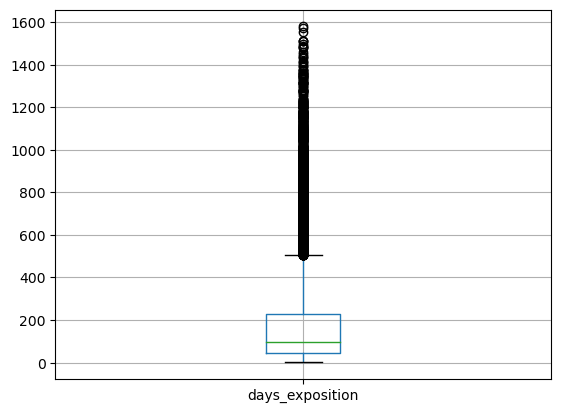

In [106]:
data.boxplot(column='days_exposition')


Анализ показал, что продажа квартиры в среднем занимает 180 дней, медиана составила 95 дней. 
Быстрыми можно считать продажи входящие в первый квартиль - до 45 дней. Необычно долгими будут объявления, находящиеся после отсечки третьего квартиля - 229 дней в продаже.


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Зависимость цены от общей площади:**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

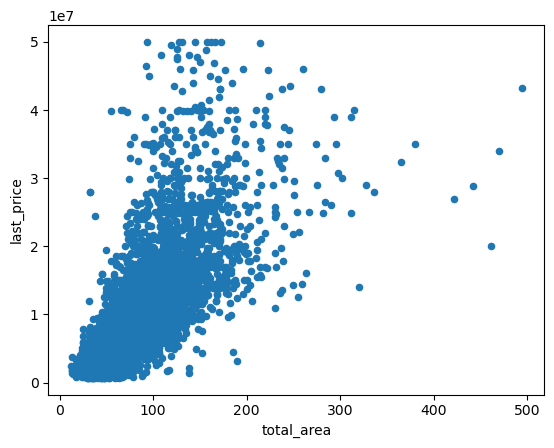

In [107]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=1)

In [108]:
data['total_area'].corr(data['last_price'])

0.7731816546498387

Корреляция в 77 % говорит о достаточно сильной связи между площадью и ценой квартиры.

**Зависимость цены от жилой площади:**

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

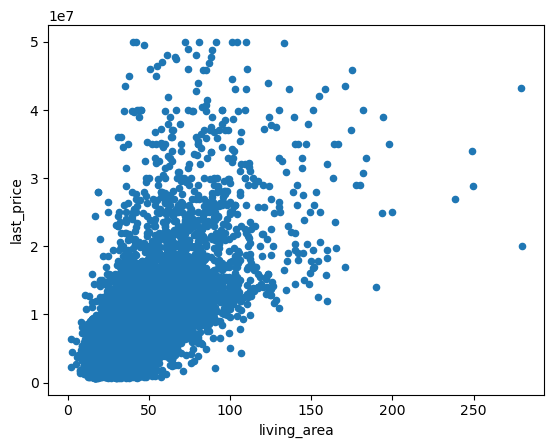

In [109]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=1)

In [110]:
data['living_area'].corr(data['last_price'])

0.6805522499259798

Корреляция в 67 % говорит о наличии связи между жилой площадью и ценой квартиры.

**Зависимость цены от площади кухни:**

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

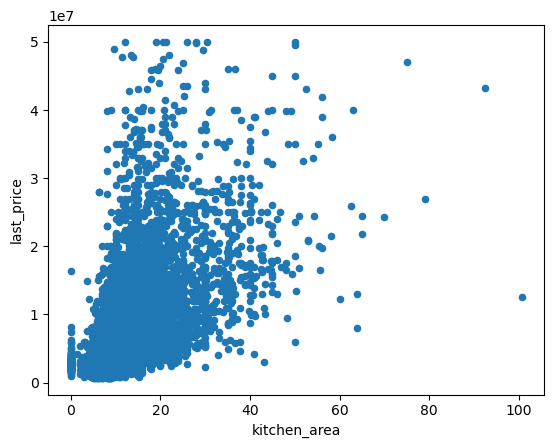

In [111]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=1)

In [112]:
data['kitchen_area'].corr(data['last_price'])

0.6177318598726358

Корреляция в 55 % показывает о зависимости между площадью кухни и ценой квартиры.

**Зависимость цены от количества комнат:**

In [113]:
rooms_last_price = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms_last_price

,last_price
rooms,
0,2700000.0
1,3600000.0
2,4780000.0
3,6190000.0
4,8900000.0
5,13000000.0
6,17000000.0


<AxesSubplot:xlabel='rooms'>

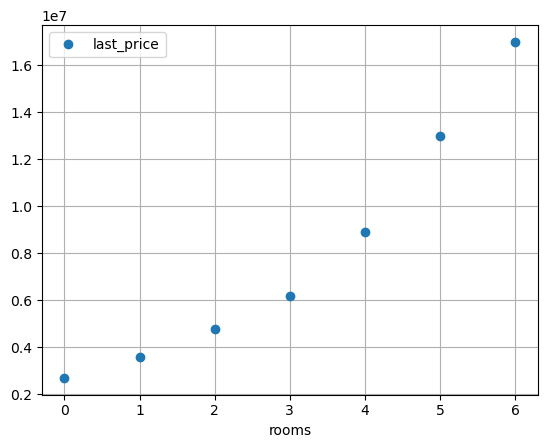

In [114]:
rooms_last_price.plot(style='o', grid=True) 

In [115]:
data['rooms'].corr(data['last_price'])

0.48252011064496175

Корреляция в 48 % показывает зависимость между количеством комнат и ценой квартиры.

**Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой):**

In [116]:
type_floor_last_price = data.pivot_table(index='type_floor', values='last_price', aggfunc='median')
type_floor_last_price

,last_price
type_floor,
first,3900000.0
last,4300000.0
other,4800000.0


<AxesSubplot:xlabel='type_floor'>

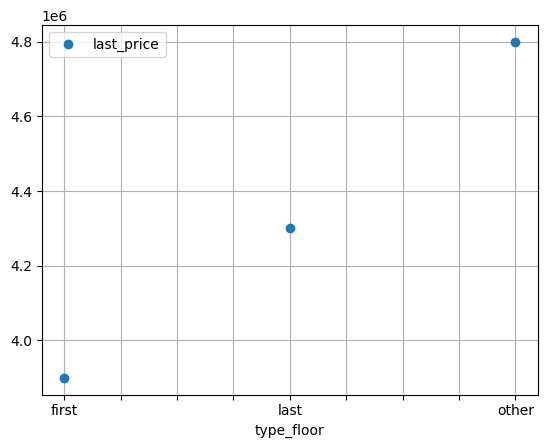

In [117]:
type_floor_last_price.plot(style='o', grid=True)

Анализ показывает, что цена квартир на первом этаже оценивается на 9,3 % ниже, чем на последнем и на 18,7 % ниже по-сравнению с другими этажами. 

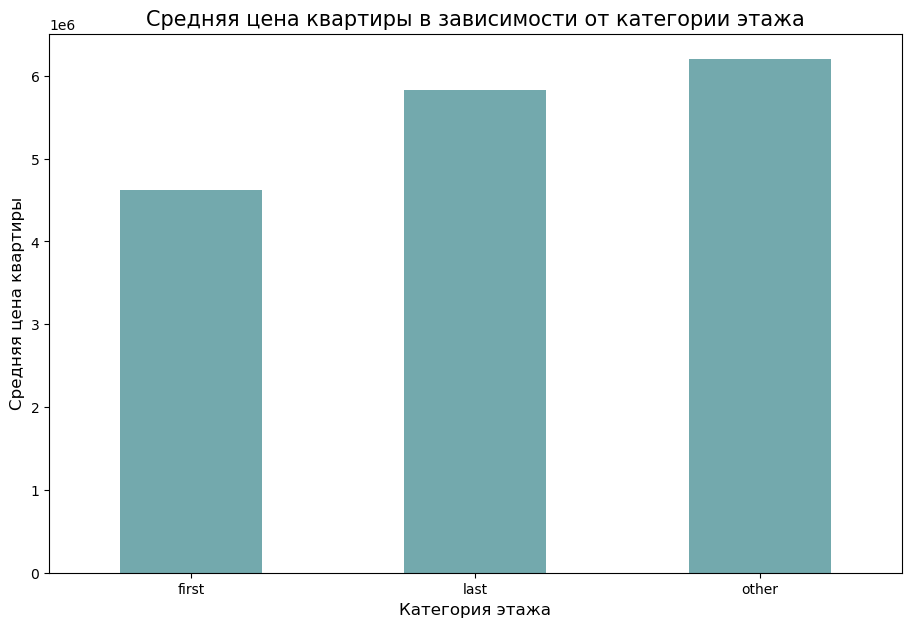

In [118]:
data.groupby('type_floor')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от категории этажа', size=15)
plt.xlabel('Категория этажа', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

**Зависимость цены от дня, месяца, года размещения объявления.** 

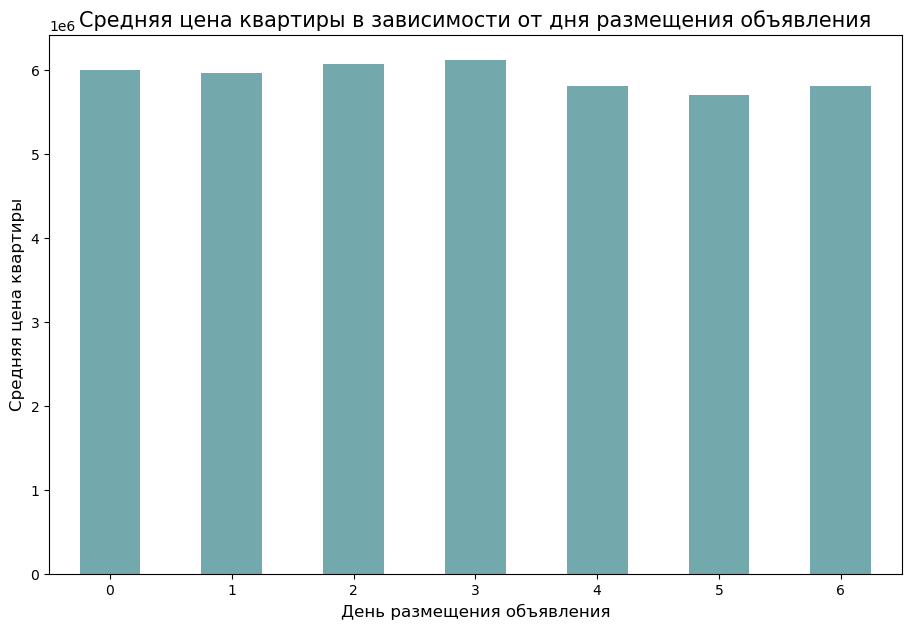

In [119]:
data.groupby('day_of_week_exposition')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от дня размещения объявления', size=15)
plt.xlabel('День размещения объявления', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

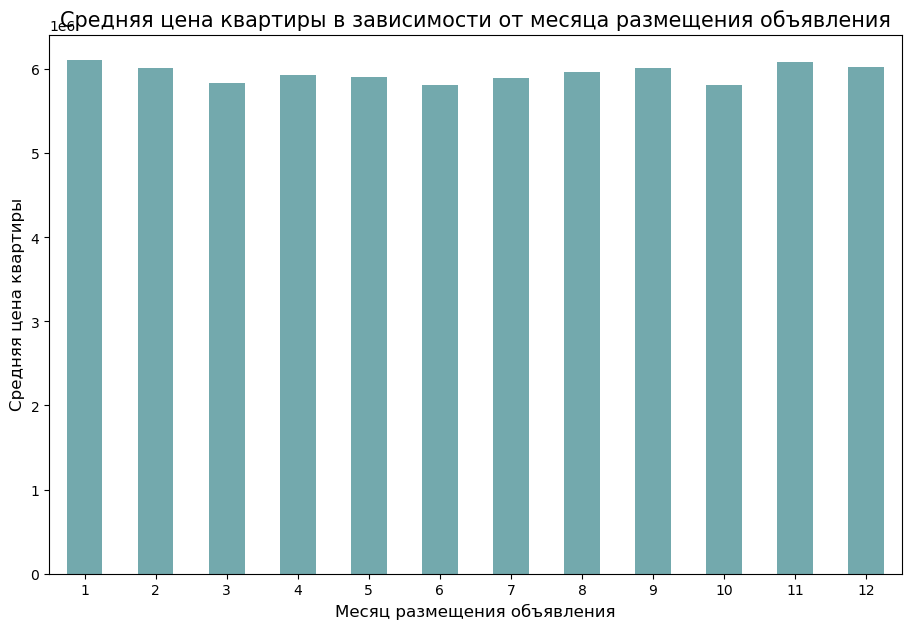

In [120]:
data.groupby('month_exposition')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от месяца размещения объявления', size=15)
plt.xlabel('Месяц размещения объявления', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

In [121]:
#медианная цена в зависимости от года публикации
year_exposition_last_price = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
year_exposition_last_price

,last_price
year_exposition,
2014,7500000.0
2015,5250000.0
2016,4500000.0
2017,4500000.0
2018,4550000.0
2019,5030000.0


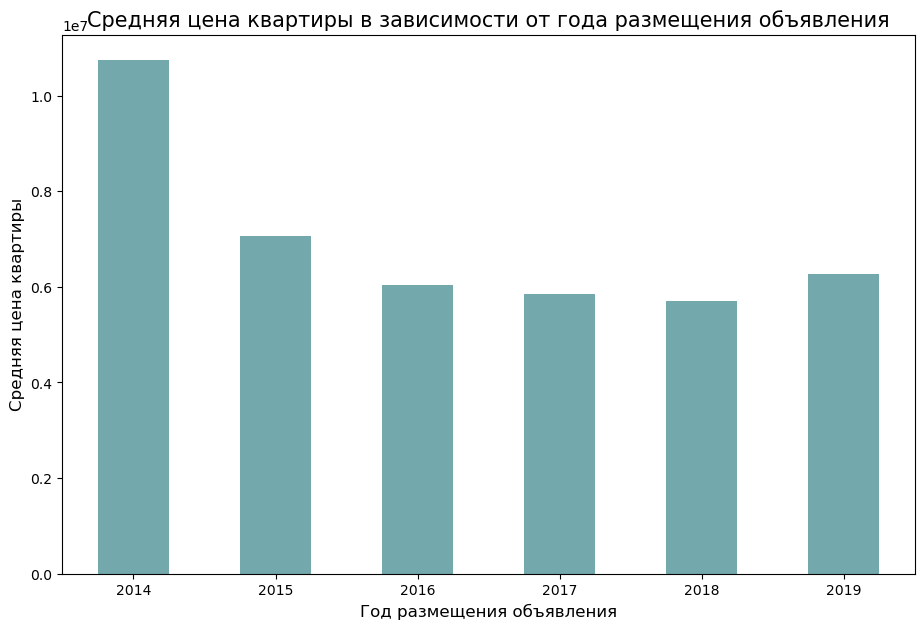

In [122]:
data.groupby('year_exposition')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от года размещения объявления', size=15)
plt.xlabel('Год размещения объявления', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

На графике видно падение цен на квартиры с 2014 по 2018 года.

Вывод: проанализировав данный датасет по параметрам: 
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год) 
видно, что больше всего на стоимость квартиры влияет общая площадь квартиры - корреляция 77 % и жилая площадь - корреляция 67 %. Существует прямая связь между количеством комнат и ценой - корреляция 48 %, но не стоит ее слишком сильно учитывать. Также на стоимость квартир влияет этаж: цена квартир на первом этаже оценивается на 9,3 % ниже, чем на последнем и на 18,7 % ниже по-сравнению с другими этажами.
Цены на квартиры в 2019 году упали на 33 % по-сравнению с 2014 годом, а самые низкие цены на квартиры держались с 2016 по 2018 года - 4,5 млн. руб по медианному значению.


#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [123]:
top10 = data['locality_name'].value_counts().head(10)

In [124]:
mean_price_one_m2 = data.query('locality_name in @top10.index').pivot_table(index = 'locality_name',\
                                                                 values = 'price_one_m2', aggfunc = 'mean')

In [125]:
mean_price_one_m2

,price_one_m2
locality_name,
всеволожск,68654.473986
выборг,58454.498311
гатчина,68746.146763
деревня кудрово,92473.547576
колпино,75333.295801
поселок мурино,85629.568678
поселок парголово,90332.263023
поселок шушары,78551.344545
пушкин,103100.890905


Самая низкая стоимость квадратного метра в городе Выборг - 58454 руб. за кв.м., самая высокая в Санкт-Петербурге 112246 руб. за кв.м.

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [126]:
spb_price = data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest_km', values='price_one_m2')

In [127]:
spb_price

,price_one_m2
cityCenters_nearest_km,
0.0,207902.570381
1.0,146589.061601
2.0,137397.949428
3.0,119223.567571
4.0,127542.238279
5.0,135572.006081
6.0,141145.907529
7.0,141949.699161
8.0,124268.046535


In [128]:
spb_price = spb_price.astype(int)

In [129]:
spb_price.sort_values('price_one_m2', ascending=False)

,price_one_m2
cityCenters_nearest_km,
0.0,207902
1.0,146589
7.0,141949
6.0,141145
2.0,137397
5.0,135572
27.0,132115
4.0,127542
8.0,124268


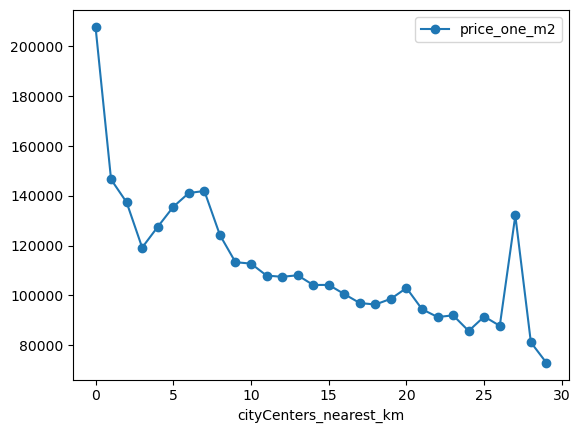

In [130]:
spb_price.plot(style='-o')
plt.show()

Из представленой таблицы видно, что в среднем самая высокая цена за кв.метр - 207902 руб. относится к квартирам, находящимся в радиусе менее чем 1 км. от центра города, а самая низкая цена - 72953 руб. к самым отдаленным - 29 км. от центра города. В общем и целом мы наблюдаем прямую зависимость цены от отдаленности от центра города.

### Общий вывод

Проанализировав данный датасет на основе данных о корреляции и графиков выявлены следующие особенности рынка квартир в Санкт-Петербурге и ближайших населенных пунктах:
 - Большая часть квартир выставленных на продажу в самом популярном ценовом сегменте от 4 до 6 млн.руб. имеет метраж от 30 до 70 кв.м, с жилой площадью от 10 до 50 кв.м и кухней от 5 до 11 кв.м. Самую большую долю составляют однокомнатные и двухкомнатные квартиры со 2 по 8 этаж, находящиеся в пятиэтажных - двадцатиэтажных домах с расстоянием от центра  10 - 16 км и близлежащим парком в радиусе 100-400 м.
 - Факторы, которые сильнее всего влияют на конечную цену: 
     Сильнее всего цены на квартиры зависят от цены за квадратный метр (практически очевидно), от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, удаленности от центра - чем дальше от центра, тем ниже цена. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем в более удаленных местах.  Цена зависит от количества комнат. Небольшое влияние оказывает присутствие парков/водоемов рядом.  Таким же образом небольшое влияние оказывает удаленность от аэропорта.
 - Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.	Квартиры, размещенные к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены стабильные и высокие.	Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры (кризис). 2019г. - цены пошли вверх впервые после наступления кризиса.
 - Самая низкая стоимость квадратного метра в городе Выборг - 58454 руб. за кв.м , самая высокая в Санкт-Петербурге - 112246 руб. за кв.м.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод